# Trace Estimator  
https://doi.org/10.1016/0377-0427(96)00018-0 
## b) Algorithm 1 with Gauss-Radau quadrature

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#for part e)
from matrices import * 
import time 
from scipy.linalg import block_diag
from helpers import *
#to save the results in a pickle file
import os 
import pickle
import pandas as pd

In [2]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
u = np.zeros(n)
u[4] = 1
u = np.random.randn(n)
def f(x):
    return 1/x
    
tol = 1e-5
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

n= 144
bounds [U,L]= [45.43404788 45.43356532]
exact value: 45.43384018044936
L<I_ex: True
U>I_ex: True
L<U = True


In [3]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)
def f(x):
    return 1/x
#notice that in python Z=1/A outputs Z[i,j]=1/A[i,j] which isn't what we want but! With the way our algorithm is define
#and the way it makes computations it doesn't matter


u = np.zeros(n)
u[1] = 1
#u = np.random.randn(n)
tol = 1e-3
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

bounds [U,L]= [0.1984 0.1984]
exact value: 0.19840000000000016
L<I_ex: True
U>I_ex: False
L<U = False


In [4]:
n = 5
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

vec1 = -1*np.ones(n-1)
vec2 = 2*np.ones(n)
vec3 = -1*np.ones(n-1)
A = tridiag(vec1, vec2, vec3)

u = np.zeros(n)
u[1] = 1
# u = np.random.randn(n)
tol = 1e-2
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [L, U]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

bounds [L, U]= [1.33333333 1.33333333]
exact value: 1.333333333333333
L<I_ex: False
U>I_ex: True
L<U = False


## d) Algorithm 2 

In [5]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

n= 144
bounds [U,L]= (77.28770866792549, 53.520068753247806, 65.40388871058666)
exact value of trace of the inverse: 65.60090633777952 found estimated value: 65.40388871058666 difference in two norm 0.19701762719286364
L<I_ex: True
U>I_ex: True
L<U = True


In [6]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)

def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

bounds [U,L]= (26.16549062891829, 21.444365371081727, 23.804928000000004)
exact value of trace of the inverse: 23.808 found estimated value: 23.804928000000004 difference in two norm 0.003071999999995967
L<I_ex: True
U>I_ex: True
L<U = True


## e) Numerical experiments | need to be run for different accuracies (that's what is asked)
so that's what I did, there's not much difference between the different accuracies, maybe when increasing matrix size we'll see a change

In [7]:
def numerical_experiments2(matrix, matrix_label, savefile):
    '''
    runs the numerical experiments and returns 2 array with the running time and the value found for each experiment
    
        input: matrix: numpy array the matrix we want to study
    
        output: list of the running time for each numerical experiment for matrix list of the computed value
    '''
    #defining the required values
    
    n=matrix.shape[0]
    matrix_running_time=np.zeros(8)
    matrix_trace_value=np.zeros(8)
    
    def f(x):
        return 1/x
    
    tol=[1e-8,1e-5, 1e-1]
    
    #using algorithm 1
    
    for k in range(len(tol)):
        start=time.time()
        Tr_A_inv=0

        for i in range (n):
            e=np.zeros(n)
            e[i]=1
            Tr_A_inv+=algorithm_1(matrix,e,function=f, maxit=50, epsilon=tol[k])

        execution_algo_1=time.time()-start
        matrix_running_time[k]=execution_algo_1
        matrix_trace_value[k]=(Tr_A_inv[0]+Tr_A_inv[1])/2
    
    #running time of algo 2

    for k in range(len(tol)):
        start=time.time()
        L=algorithm_2(matrix,m=50,p=0.5, function=f, epsilon=tol[k]) #for some m,p to tune 
        execution_algo_2=time.time()-start 

        matrix_running_time[3+k]=execution_algo_2
        matrix_trace_value[3+k]=L[2]
    
    #running time using built in numpy functions
    start=time.time()
    Tr_A_inv=np.trace(np.linalg.inv(matrix))
    execution_built_in=time.time()-start 
    matrix_running_time[6]=execution_built_in
    matrix_trace_value[6]=Tr_A_inv
    
    #running time using n linear systems

    start=time.time()
    Tr_A_inv=np.trace(np.linalg.solve(matrix, np.eye(n)))
    execution_linear=time.time()-start
    matrix_running_time[7]=execution_linear
    matrix_trace_value[7]=Tr_A_inv
    
    mpl.rcParams["font.size"] = 20
    
    fig, axs=plt.subplots(2,1, figsize= (20,25), sharey = False, sharex = False)
    legend = ['algo_1_1e-8', 'algo_1_1e-5', 'algo_1_1e-1','algo_2_1e-8', 'algo_2_1e-5', 'algo_2_1e-1','tr(A-1)', 'lin. systems']
    
    axs[0].bar(legend, matrix_running_time, color='b')
    axs[0].set_yscale('log')
    axs[0].set_ylabel('running time in seconds (in logscale)', fontsize=30)
    axs[0].set_title('running time differences for '+ matrix_label, fontsize=42)
    
    axs[1].bar(legend, matrix_trace_value, color='orange')
    axs[1].set_yscale('log')
    axs[1].set_ylabel('computed value of the method (in logscale)', fontsize=30)
    axs[1].set_title('computed value differences for '+ matrix_label, fontsize=42)
    
    plt.savefig('new_figures/' + savefile +'.png')
    
    return

In [8]:
#--- I have set all the sizes so that they are our matrices final sizes. I have chosen st they are same as in the paper and
#if in the paper was paper the biggest size below that that fit in memory

#defining all the matrices at once

#heat_flow_matrix 
N=30 #hence has final size 900 as in the paper
nu=0.2 
heat_flow_matrix=heat_flow_function(nu,N)

# VFH matrix
VFH_matrix=-VFH_function(4) #hence has size 625 as in the paper

#Poisson matrix
poisson_matrix=Poisson_function(30) #hence has size 900 as in the paper

#Wathen matrix
nx=12
ny=12 #as in the paper
wathen_matrix=wathen_ge(nx, ny)
    
#Lehmer matrix
lehmer_matrix=Lehmer_function(200) #as in the paper

#Pei matrix
alpha=1
n=300 #as in the paper
pei_matrix=Pei_function(alpha, n)

#### Heat flow matrix

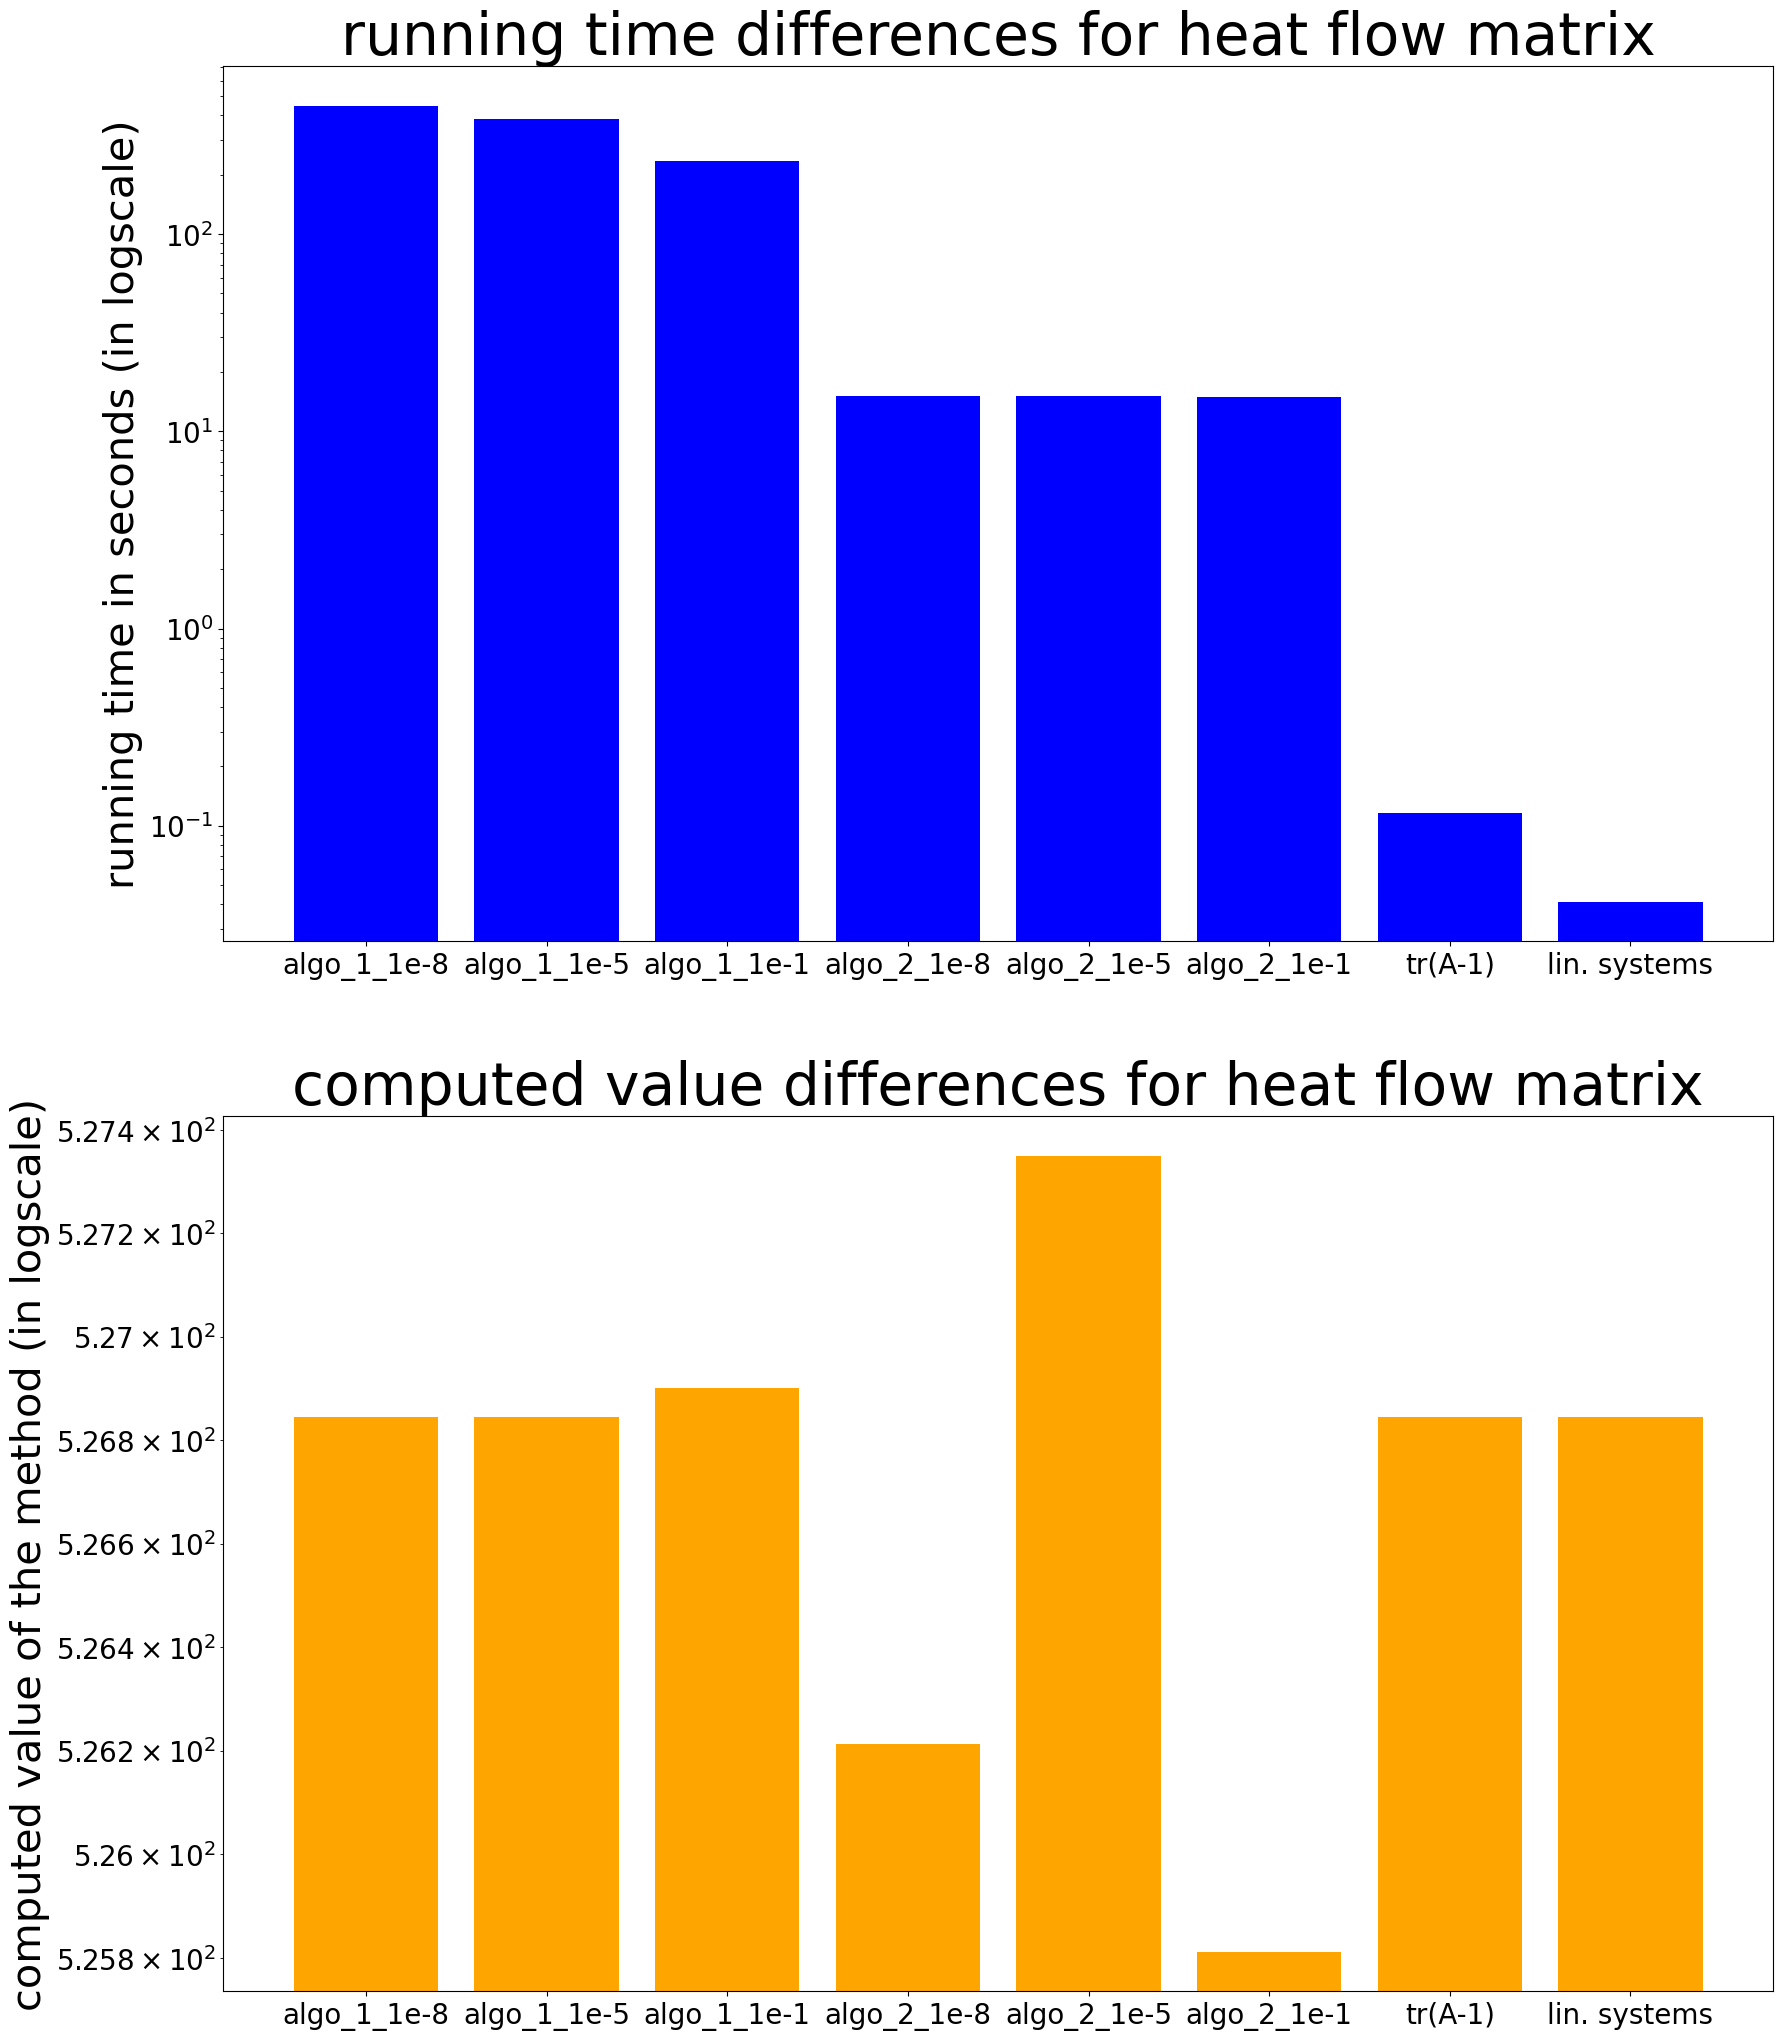

In [10]:
numerical_experiments2(heat_flow_matrix, "heat flow matrix", 'running_time_heat_flow_matrix')

#### VFH matrix

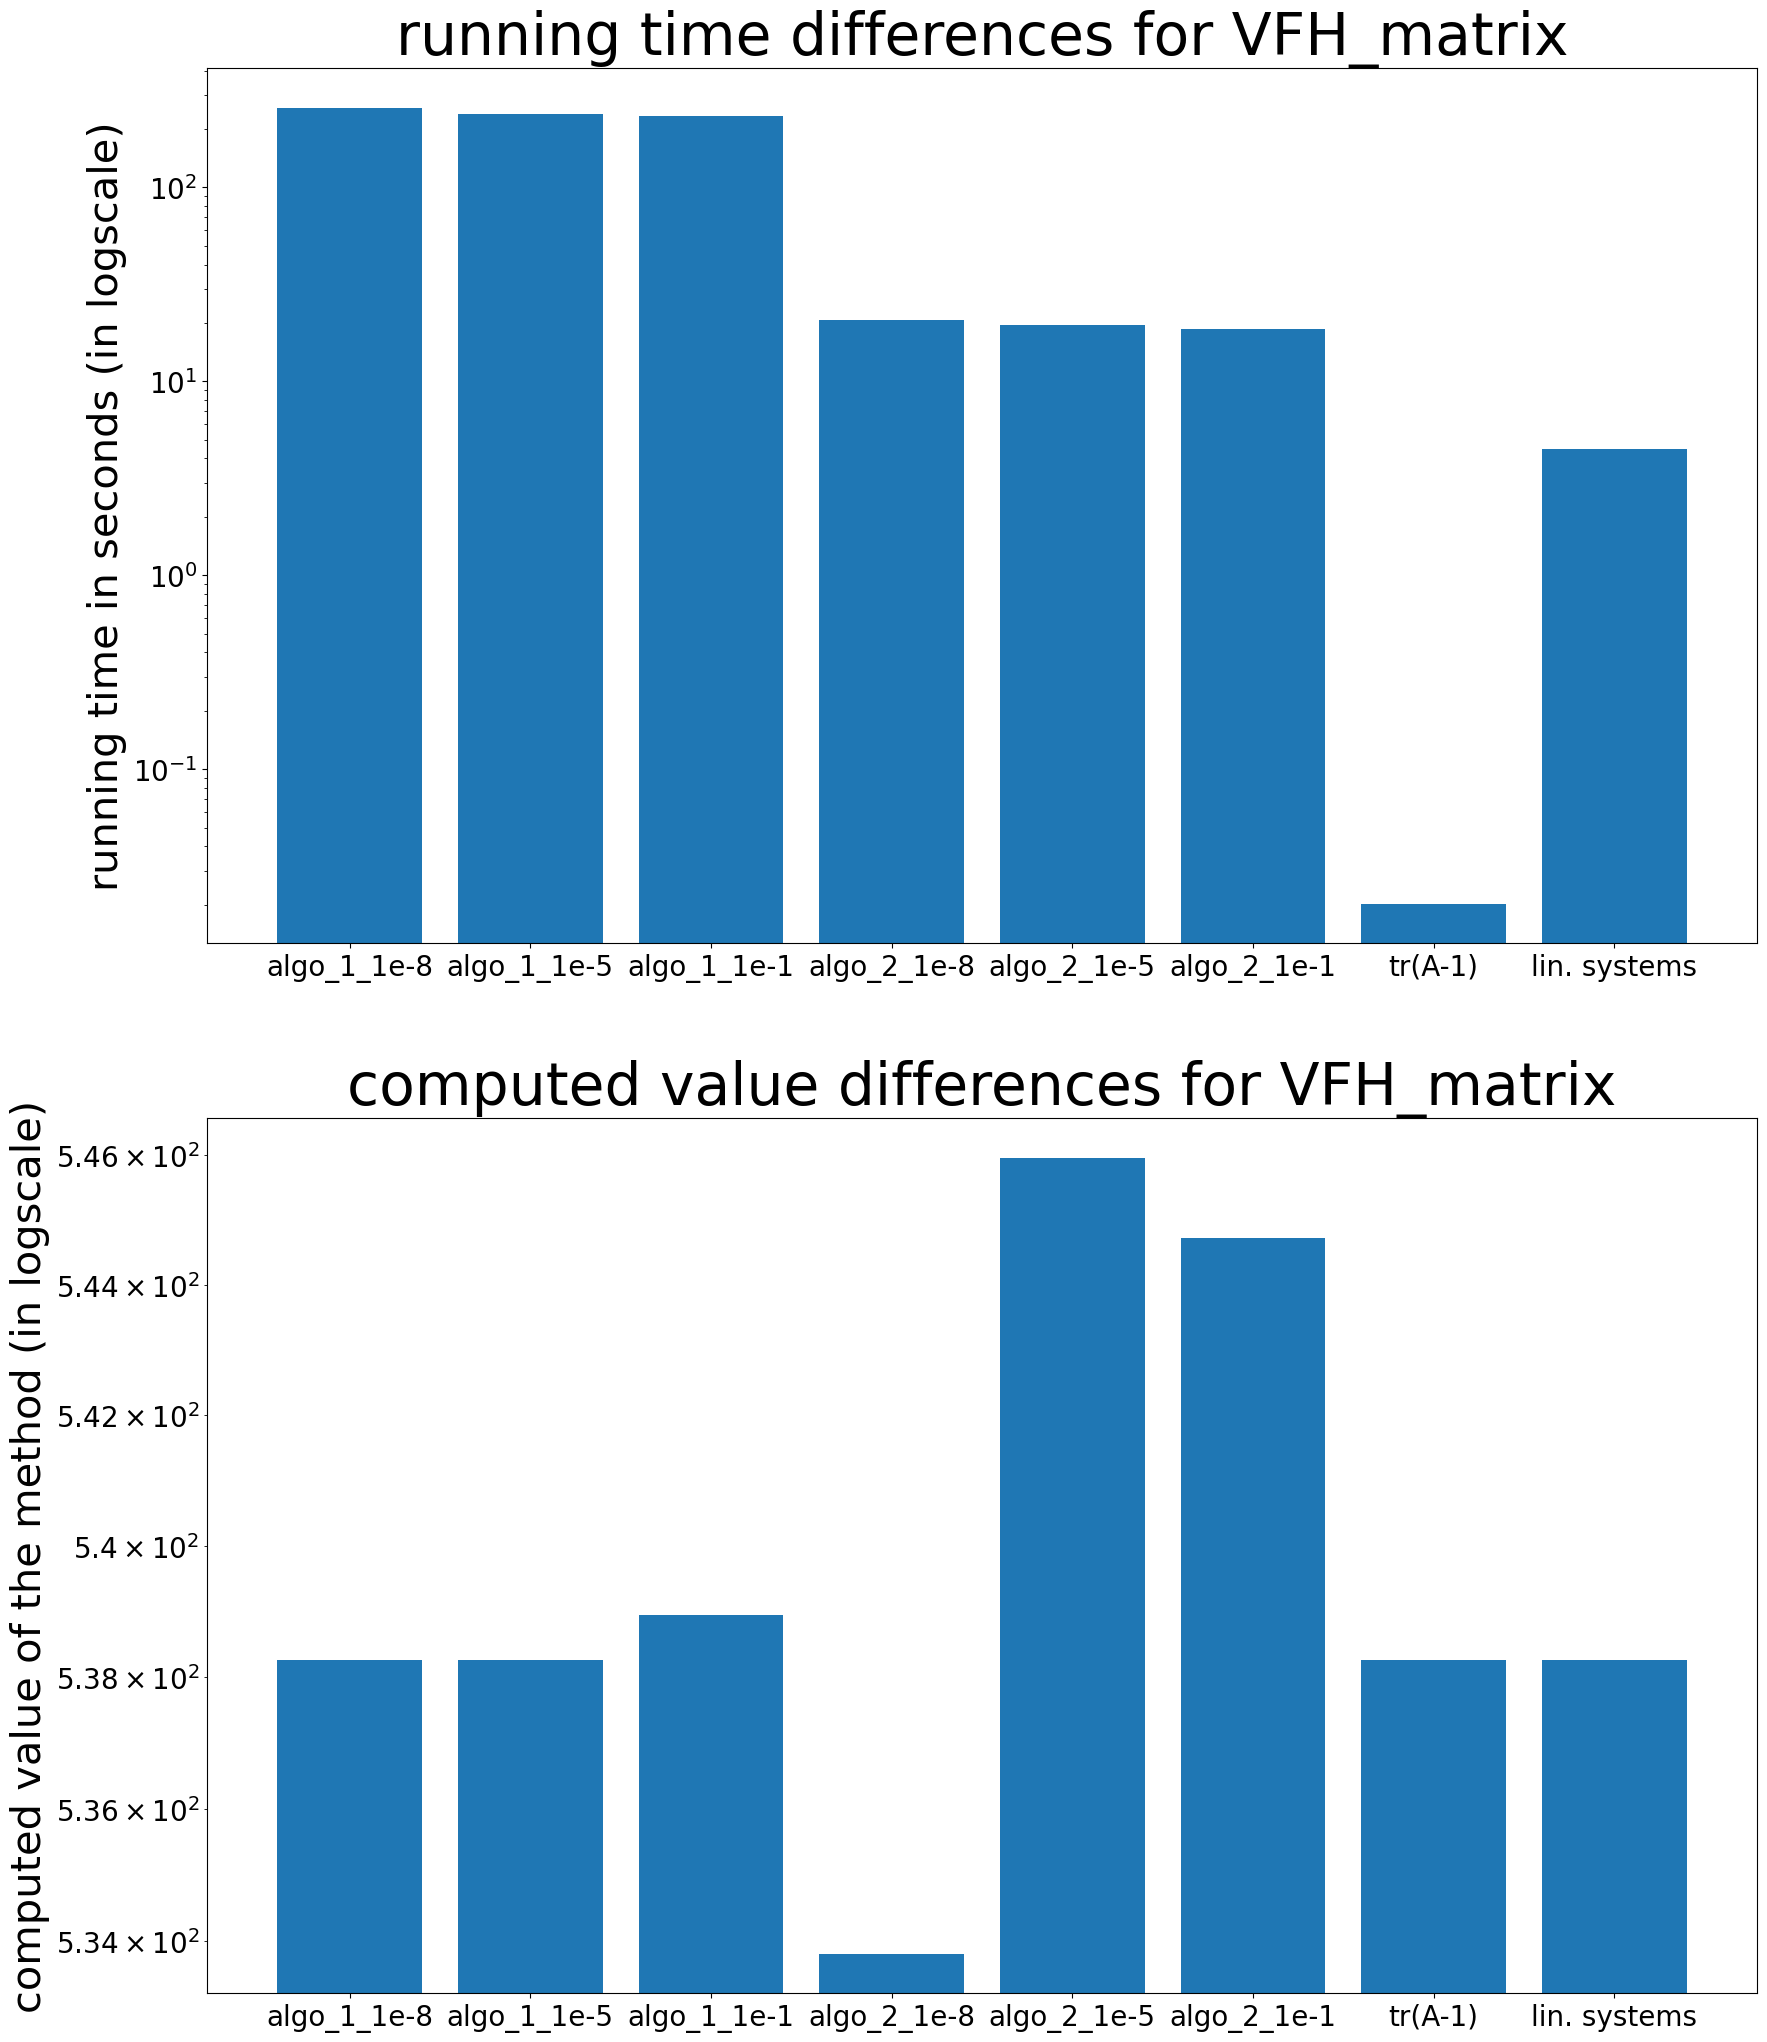

In [4]:
numerical_experiments2(VFH_matrix, "VFH matrix", 'running_time_VFH_matrix')

#### Poisson matrix

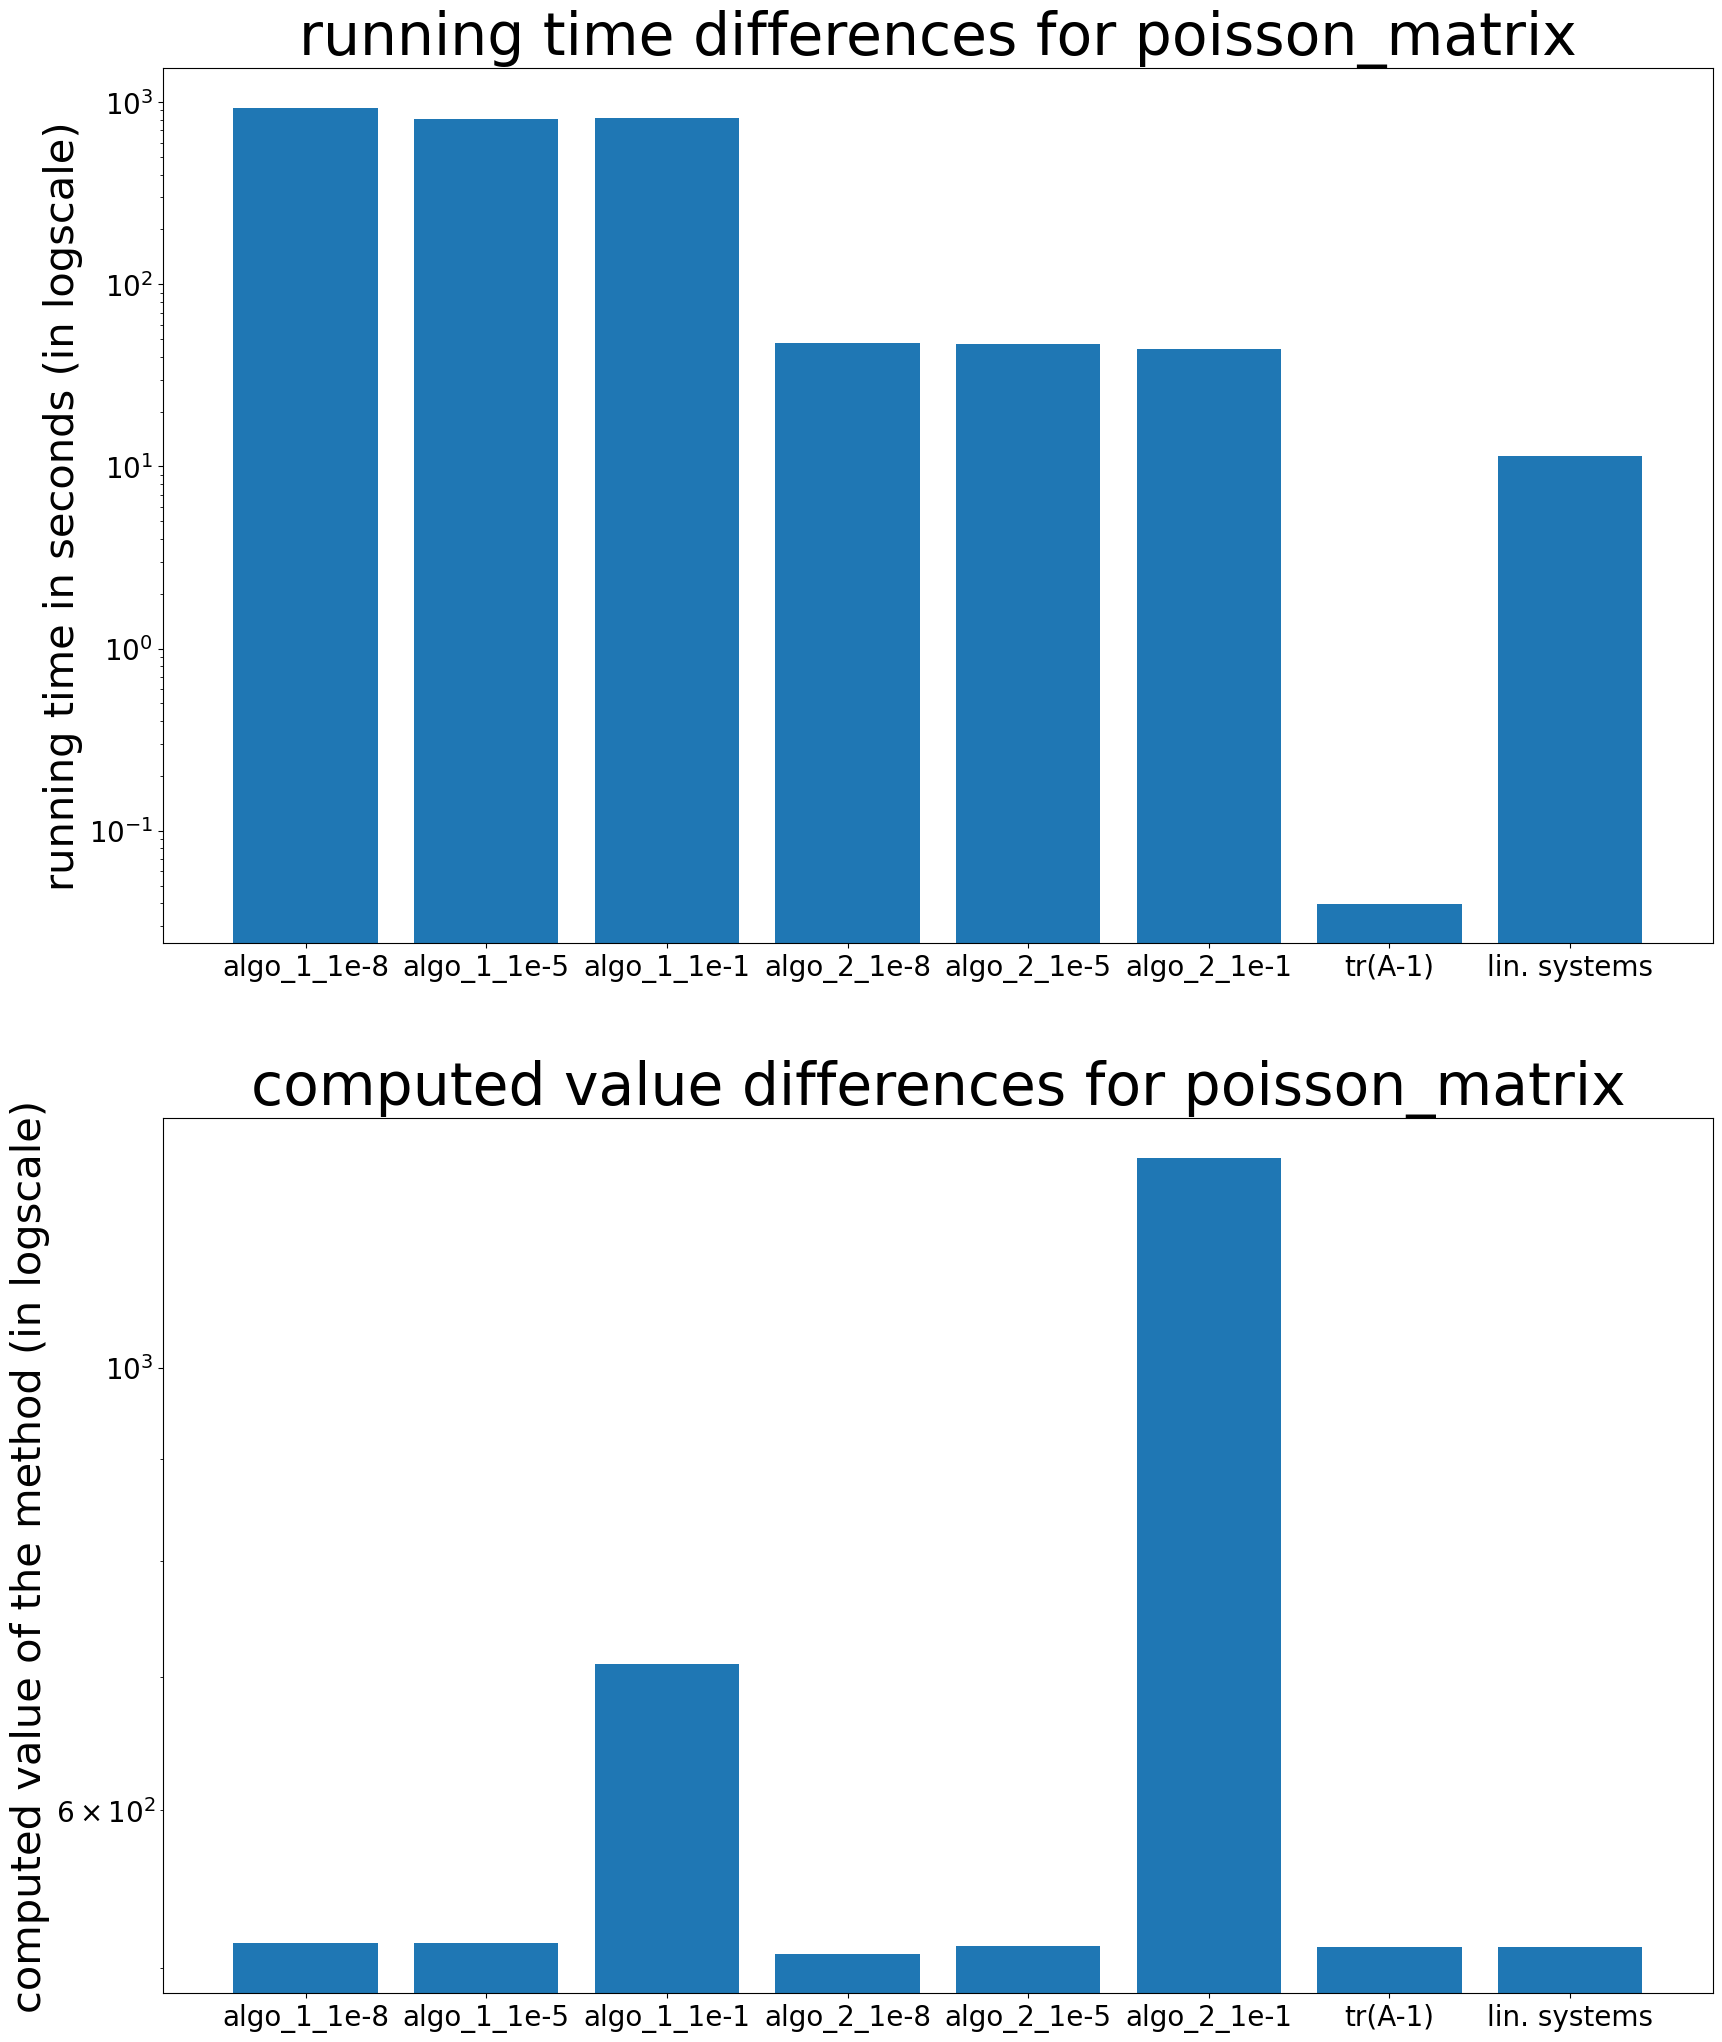

In [5]:
numerical_experiments2(poisson_matrix, "poisson matrix", 'running_time_poisson_matrix')

#### Wathen matrix

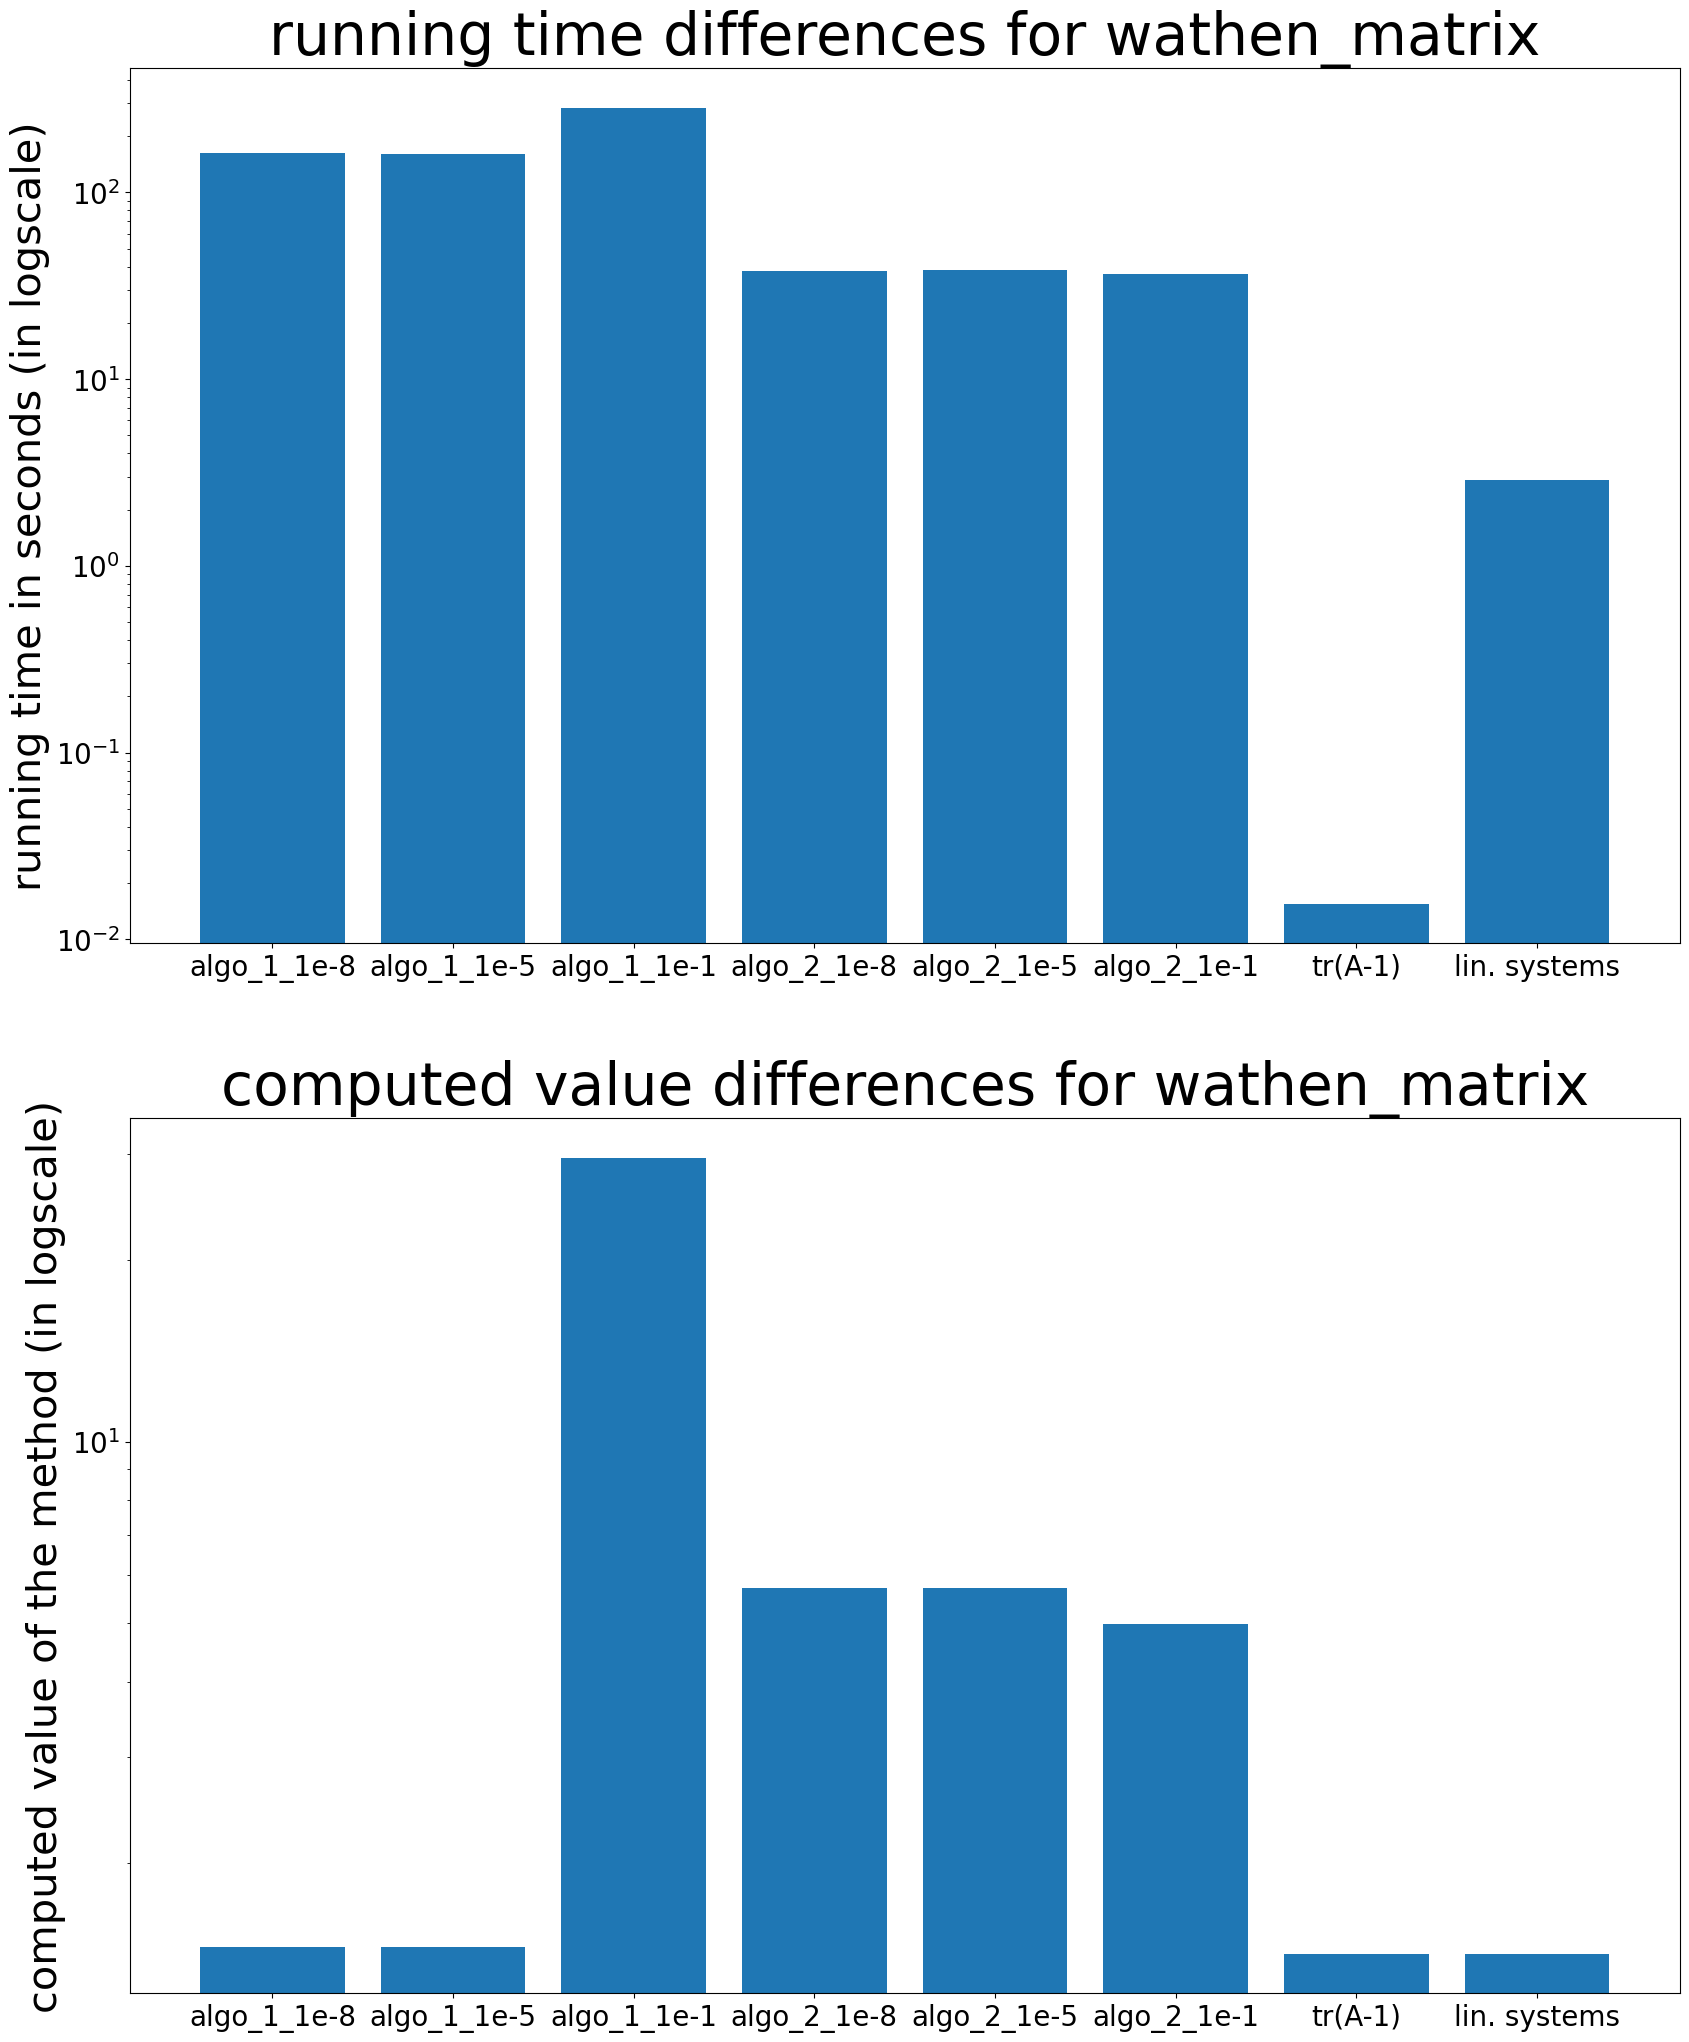

In [6]:
numerical_experiments2(wathen_matrix, "wathen matrix", 'running_time_wathen_matrix')

#### Lehmer matrix

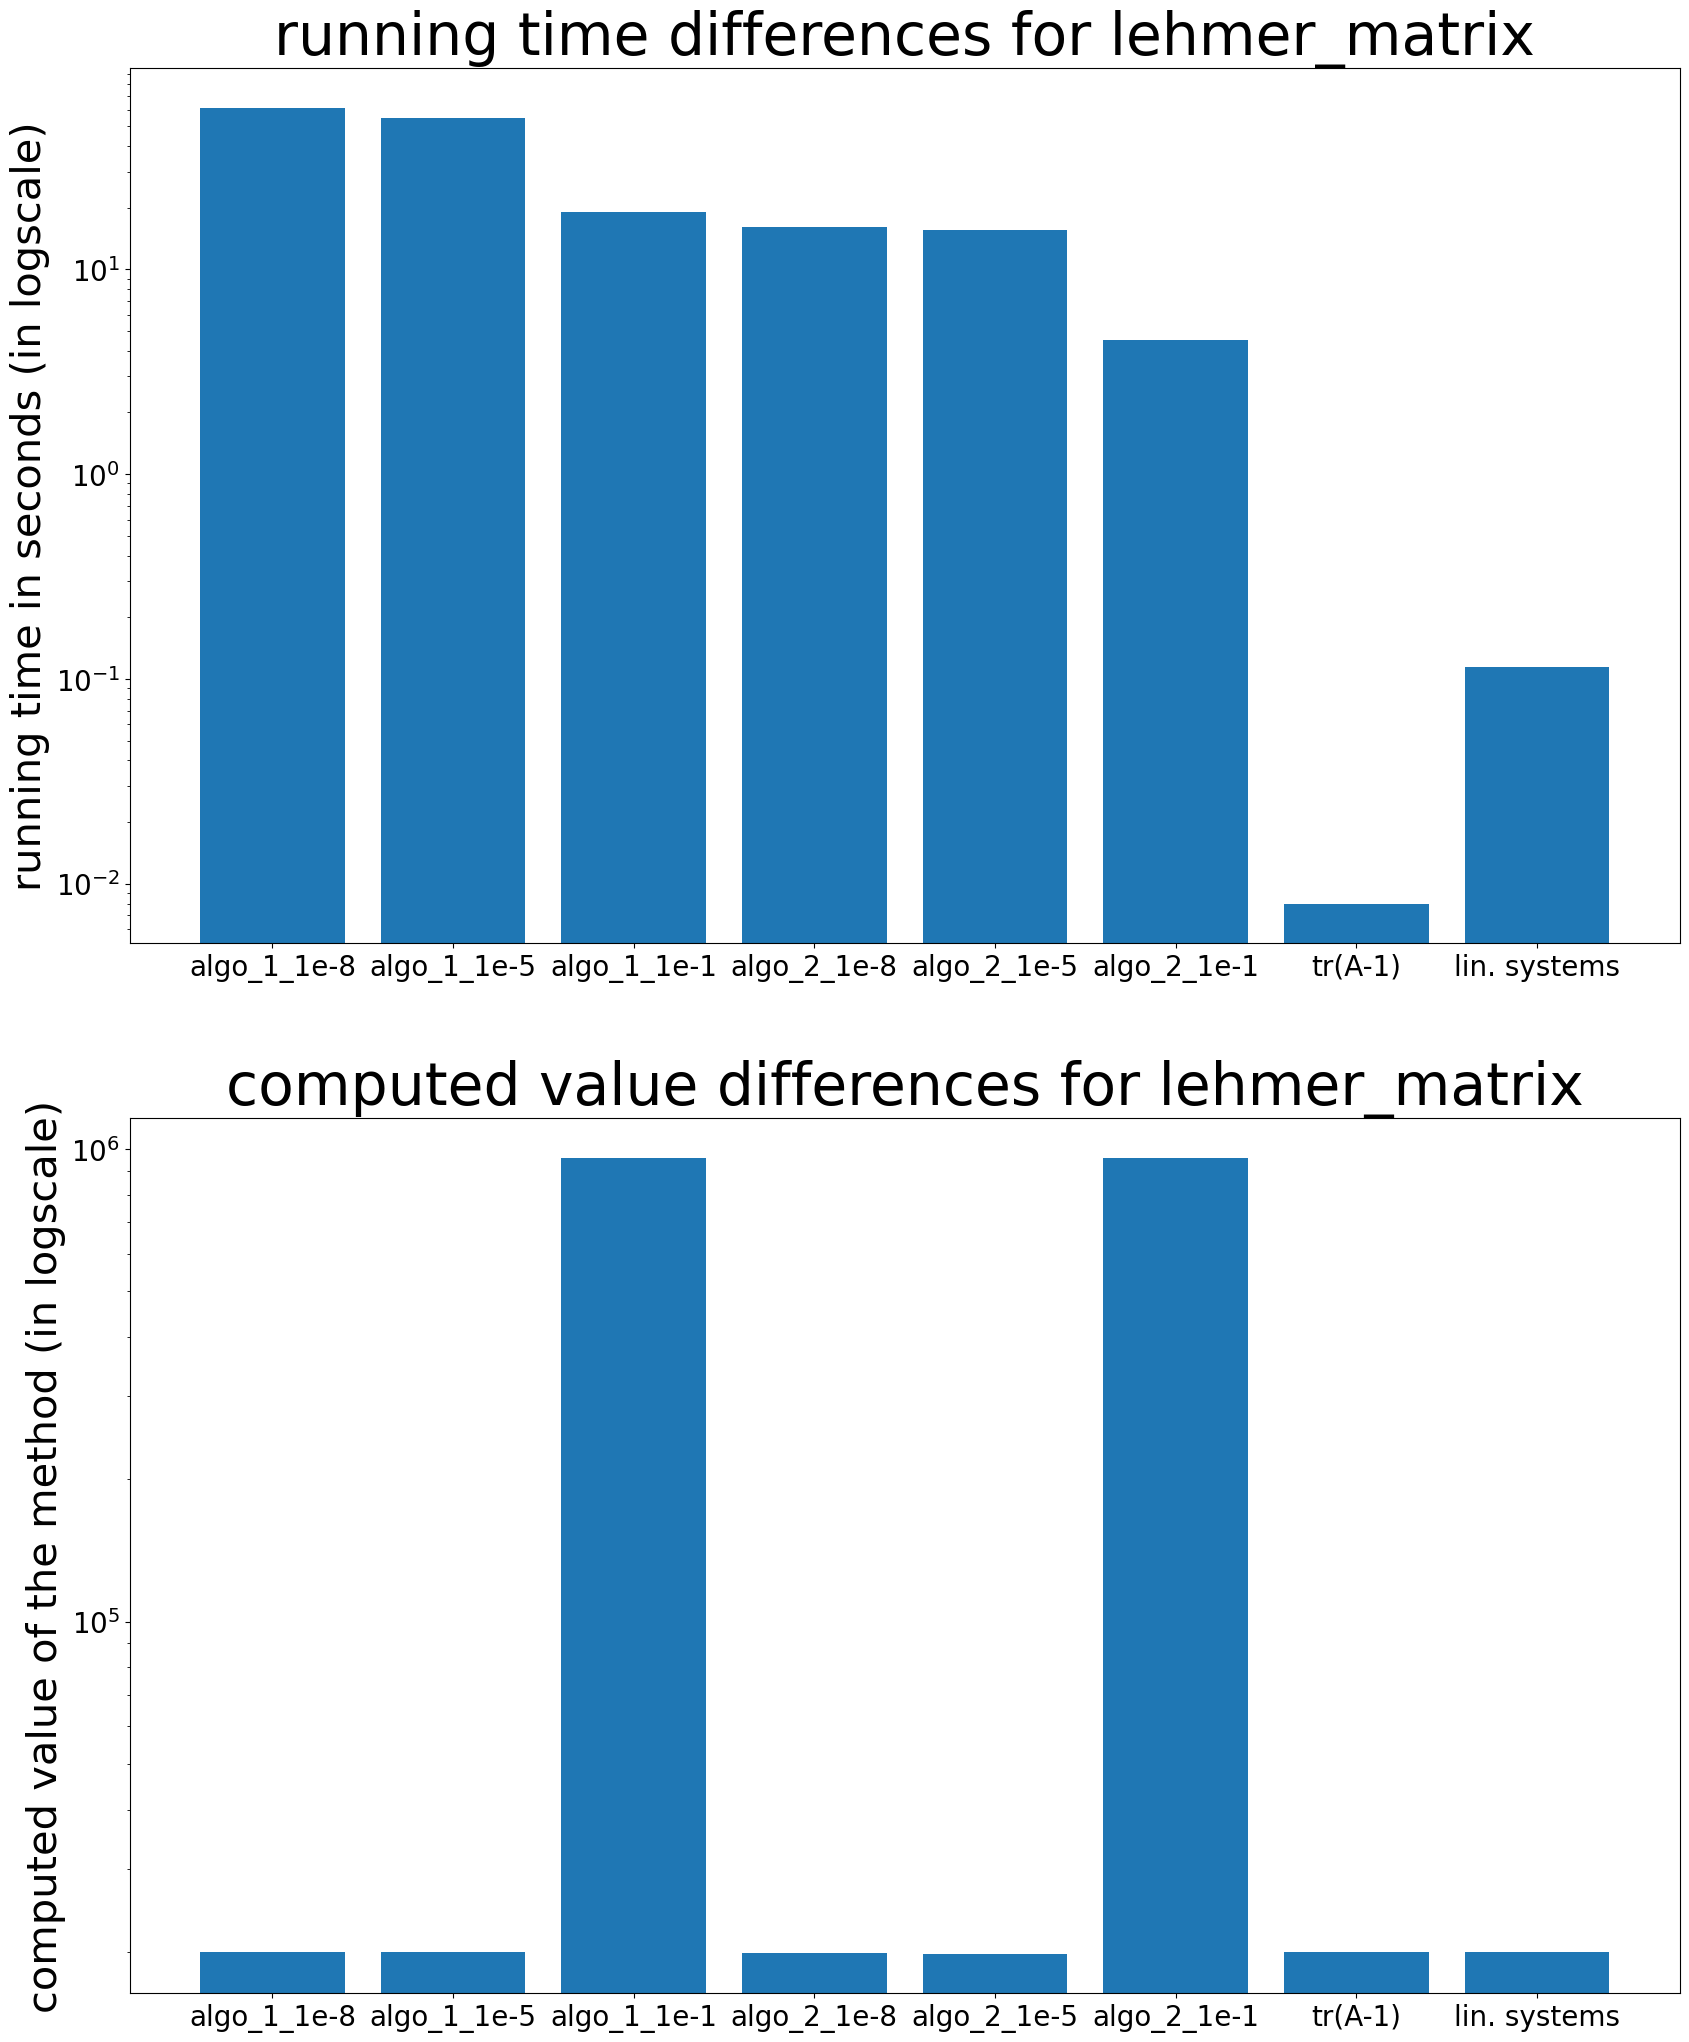

In [7]:
numerical_experiments2(lehmer_matrix, "lehmer matrix", 'running_time_lehmer_matrix')

#### Pei matrix

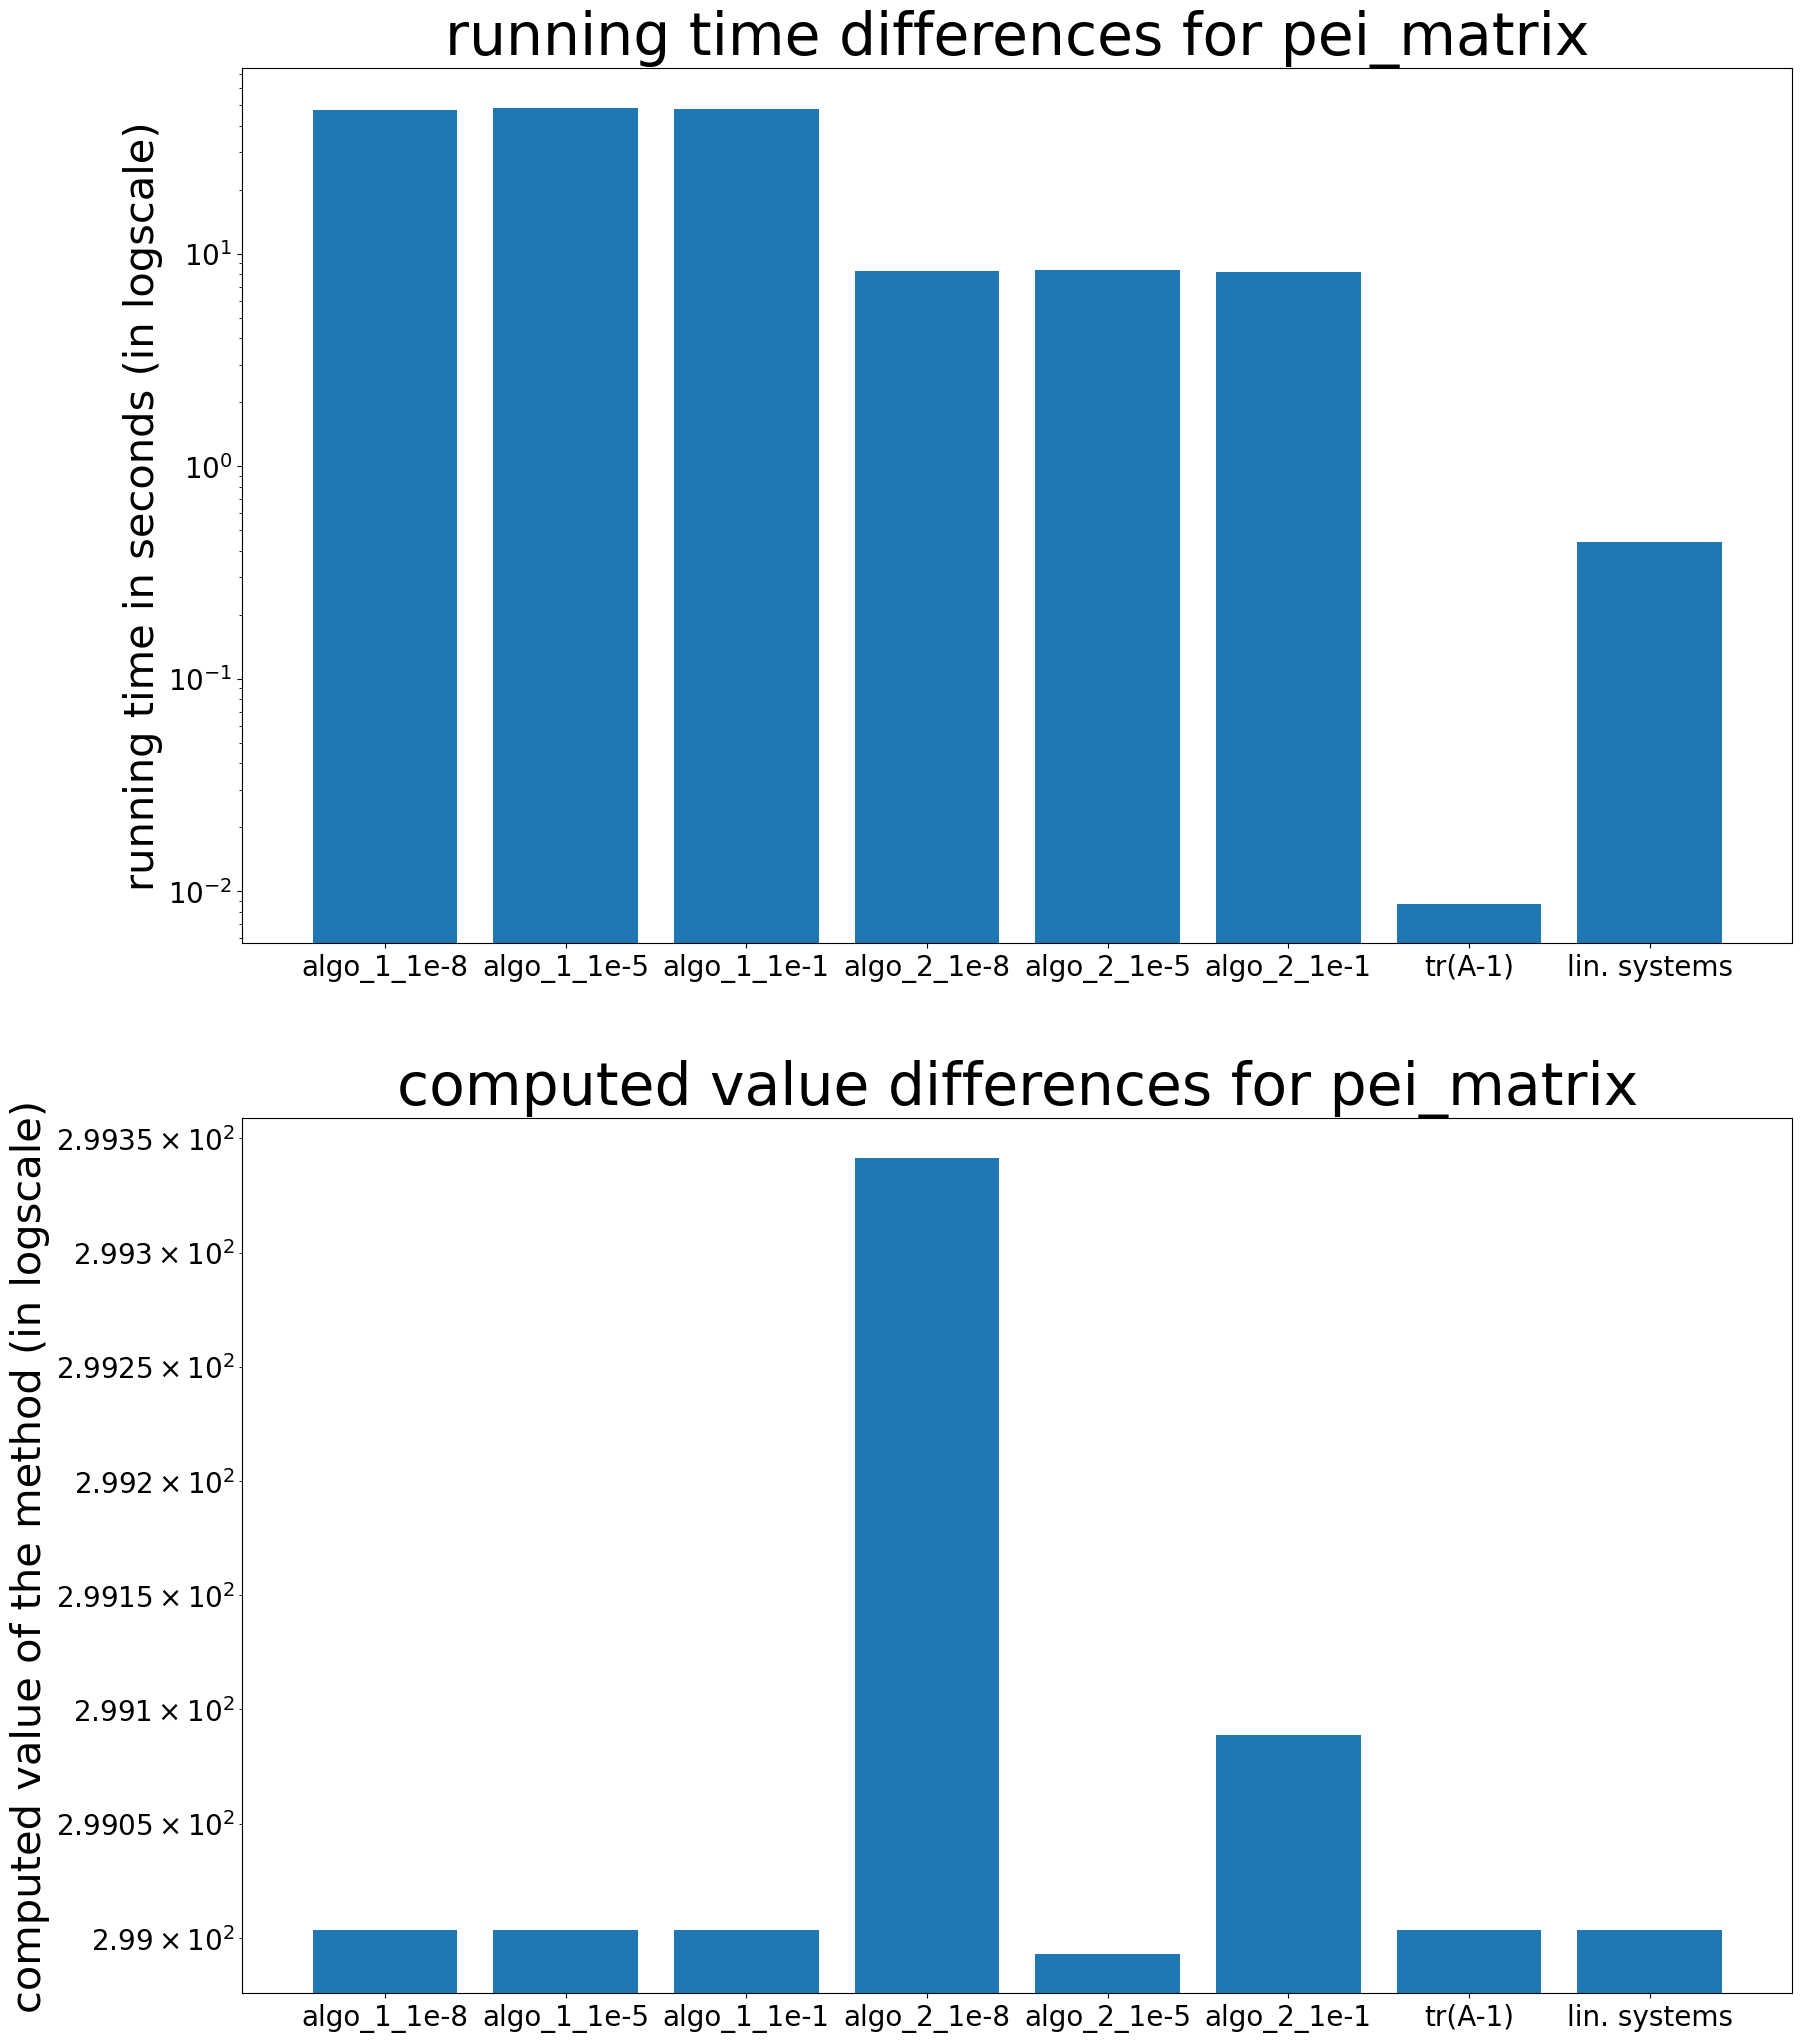

In [8]:
numerical_experiments2(pei_matrix, "pei matrix", 'running_time_pei_matrix')